In [126]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import os
from neo import io
import seaborn as sns
from scipy.signal import find_peaks

font = {'size'   : 8}
matplotlib.rc('font', **font)

from scipy import stats

# CV analysis of Larkum data

Data will be made available upon request. This notebook will not run without the data, but has been included for code transperancy.

## Test spike detection

In [127]:
igor_read = io.IgorIO('../LarkumDataArchive/d020108a.dat/t11S1.ibw').read_analogsignal()
igor_read_input = io.IgorIO('../LarkumDataArchive/d020108a.dat/t11S1_outwave.ibw').read_analogsignal()

igor_read = io.IgorIO('../LarkumDataArchive/d020108a.dat/t11S1.ibw').read_analogsignal()
igor_read_input = io.IgorIO('../LarkumDataArchive/d020108a.dat/t11S1_outwave.ibw').read_analogsignal()

spike_threshold = 0
current_spike_mask, _ = find_peaks(igor_read.as_array()[:, 0], height=spike_threshold)

410000
935.40247 dimensionless
0.1 s
[57.5 33.8 78.1  9.8 44.8 44.3 39.3 14.2 71.8 55.6 12.1 54.  76.2 29.1
 25.9  8.3 62.  52.2 18.2 48.2 23.4 72.8 35.2 44.1 11.4 16.2 78.6 44.3
 63.8 13.3 33.2 26.9 39.1 55.5 79.1 54.2 33.6 60.5 12.9 27.9  8.8 78.8
 20.9 16.5 56.5 38.5 26. ] s
24.640872391737442
48
410000


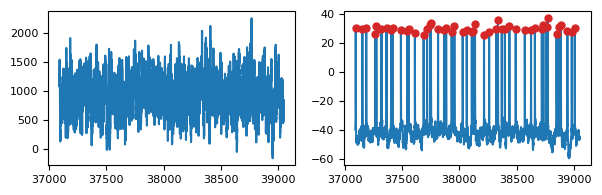

In [128]:
i = 19
z = int(len(igor_read.times)/21)
plt.figure(figsize=(7, 2))
plt.subplot(1,2,1)
plt.plot(igor_read_input.times[i*z:(i+1)*z], igor_read_input[i*z:(i+1)*z])
print(len(igor_read_input))
print(np.mean(igor_read_input[i*z:(i+1)*z]))

plt.subplot(1,2,2)

current_spike_mask_tmp = current_spike_mask[current_spike_mask>=i*z]
current_spike_mask_tmp = current_spike_mask_tmp[current_spike_mask_tmp<(i+1)*z]


plt.plot(igor_read.times[i*z:(i+1)*z], igor_read[i*z:(i+1)*z])
#plt.plot(igor_read.times[current_spike_mask], igor_read.as_array()[current_spike_mask, 0], '.', ms=10)

plt.plot(igor_read.times[current_spike_mask_tmp], igor_read.as_array()[current_spike_mask_tmp, 0]+2, '.', ms=10, color='tab:red')


dt = 1/igor_read.sampling_rate
print(dt)

ISI = np.diff(current_spike_mask_tmp)
print(ISI*dt)
print(1/(np.mean(ISI)*1e-4))

print(len(current_spike_mask_tmp))
print(len(igor_read))

In [129]:
def get_neuron_response(igor_read):

    spike_threshold = 0
    current_spike_mask, _ = find_peaks(igor_read.as_array()[:, 0],height=spike_threshold)

    mu_s = np.ones(len(igor_read.times))
    A = np.zeros(21)
    CV = np.zeros(21)

    dt = 1/igor_read.sampling_rate
    z = int(len(igor_read.times)/21)
    #print(igor_read.times)
    for i in range(21):
        mu_s[i*z:(i+1)*z] = i*50

        current_spike_mask_tmp = current_spike_mask[current_spike_mask>=i*z]
        current_spike_mask_tmp = current_spike_mask_tmp[current_spike_mask_tmp<(i+1)*z]

        #spike_times = igor_read.times[current_spike_mask_tmp]
        ISIs = np.diff(current_spike_mask_tmp)
        
        #print(ISIs)
        
        if len(ISIs)>=5: 
            A[i] = 1 / (np.mean(ISIs)*1e-4)
            CV[i] = np.std(ISIs)/np.mean(ISIs)
        else: 
            A[i] = np.nan
            CV[i] = np.nan
    
    return A, CV

## Get current and voltage traces for schematic - Figure 3a

In [130]:
igor_read_soma = io.IgorIO('../LarkumDataArchive/d020108a.dat/t11S1.ibw').read_analogsignal()
igor_read_input_soma = io.IgorIO('../LarkumDataArchive/d020108a.dat/t11S1_outwave.ibw').read_analogsignal()

igor_read_dend = io.IgorIO('../LarkumDataArchive/d020108a.dat/t11D1.ibw').read_analogsignal()
igor_read_input_dend = io.IgorIO('../LarkumDataArchive/d020108a.dat/t11D1_outwave.ibw').read_analogsignal()

508.23972 dimensionless


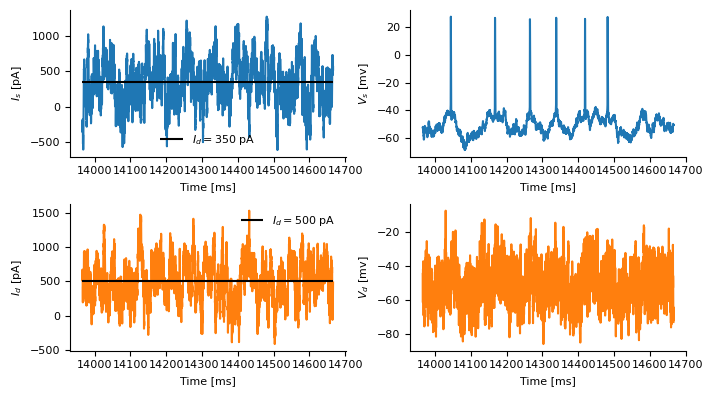

In [131]:
i = 7
z = int(len(igor_read.times)/21)
plt.figure(figsize=(7, 4))

plt.subplot(2,2,1)

#plt.plot(igor_read_input_soma.times[i*z:(i+1)*z], igor_read_input_soma[i*z:(i+1)*z])
plt.plot(igor_read_input_soma.times[i*z+3000:i*z + 10000], igor_read_input_soma[i*z+3000:i*z + 10000])

plt.hlines(350, igor_read_input_soma.times[i*z+3000], igor_read_input_soma.times[i*z + 10000], color='k', label='$I_{d}=350$ pA')
sns.despine()
#print(np.mean(igor_read_input[i*z:(i+1)*z]))

plt.xlabel('Time [ms]')
plt.ylabel('$I_{s}$ [pA]')

plt.legend(frameon=False)

plt.subplot(2,2,2)
#plt.plot(igor_read_input_soma.times[i*z:(i+1)*z], igor_read_soma[i*z:(i+1)*z])
plt.plot(igor_read_input_soma.times[i*z+3000:i*z + 10000], igor_read_soma[i*z+3000:i*z + 10000])
sns.despine()
plt.xlabel('Time [ms]')
plt.ylabel('$V_{s}$ [mv]')


plt.subplot(2,2,3)

#plt.plot(igor_read_input_dend.times[i*z:(i+1)*z], igor_read_input_dend[i*z:(i+1)*z], color='tab:orange')
plt.plot(igor_read_input_dend.times[i*z+3000:i*z + 10000], igor_read_input_dend[i*z+3000:i*z + 10000], color='tab:orange')

plt.hlines(500, igor_read_input_dend.times[i*z+3000], igor_read_input_dend.times[i*z + 10000], color='k', label='$I_{d}=500$ pA')
sns.despine()
print(np.mean(igor_read_input_dend[i*z:(i+1)*z]))

plt.xlabel('Time [ms]')
plt.ylabel('$I_{d}$ [pA]')

plt.legend(frameon=False)

plt.subplot(2,2,4)
#plt.plot(igor_read_input_dend.times[i*z:(i+1)*z], igor_read_dend[i*z:(i+1)*z], color='tab:orange')
plt.plot(igor_read_input_dend.times[i*z+3000:i*z + 10000], igor_read_dend[i*z+3000:i*z + 10000], color='tab:orange')
sns.despine()

plt.xlabel('Time [ms]')
plt.ylabel('$V_{d}$ [mv]')

plt.tight_layout()

plt.savefig('../results/LarkumData_example_traces.svg')


# Load data for different dendritic current levels - 0, 250, 500, 750 pA

In [132]:
# 500 pA dendritic current

file_paths_500 = []

# d020107a data set
file_paths_500.append("../LarkumDataArchive/d020107a.dat/t7S1.ibw")

# d020108a data set
file_paths_500.append("../LarkumDataArchive/d020108a.dat/t11S1.ibw")

# d020108b data set
file_paths_500.append("../LarkumDataArchive/d020108b.dat/t6S1.ibw")

# d020108c data set
file_paths_500.append("../LarkumDataArchive/d020108c.dat/t5S1.ibw")

# d020109a data set
file_paths_500.append("../LarkumDataArchive/d020109a.dat/t3S1.ibw")
file_paths_500.append("../LarkumDataArchive/d020109a.dat/t4S1.ibw")

In [133]:
# 250 pA dendritic current

file_paths_250 = []

# d020107a data set
file_paths_250.append("../LarkumDataArchive/d020107a.dat/t9S1.ibw")

# d020108a data set
file_paths_250.append("../LarkumDataArchive/d020108a.dat/t13S1.ibw")

# d020108b data set
file_paths_250.append("../LarkumDataArchive/d020108b.dat/t8S1.ibw")

# d020108c data set
file_paths_250.append("../LarkumDataArchive/d020108c.dat/t7S1.ibw")


In [134]:
# 750 pA dendritic current

file_paths_750 = []
starting_current_750 = []

# d020107a data set
file_paths_750.append("../LarkumDataArchive/d020107a.dat/t8S1.ibw")
starting_current_750.append(-250)

# d020108c data set
file_paths_750.append("../LarkumDataArchive/d020108c.dat/t6S1.ibw")
starting_current_750.append(-250)

# d020109a data set
file_paths_750.append("../LarkumDataArchive/d020109a.dat/t11S1.ibw")
starting_current_750.append(-250)

file_paths_750.append("../LarkumDataArchive/d020109a.dat/t12S1.ibw")
starting_current_750.append(-250)

# d020108b data set
file_paths_750.append("../LarkumDataArchive/d020108b.dat/t7S1.ibw")
starting_current_750.append(0)

In [135]:
file_paths_0 = []

# d020107a data set
file_paths_0.append("../LarkumDataArchive/d020107a.dat/t2S1.ibw")
file_paths_0.append("../LarkumDataArchive/d020107a.dat/t10S1.ibw")

# d020108a data set
file_paths_0.append("../LarkumDataArchive/d020108a.dat/t2S1.ibw")
file_paths_0.append("../LarkumDataArchive/d020108a.dat/t6S1.ibw")

# d020108b data set
file_paths_0.append("../LarkumDataArchive/d020108b.dat/t9S1.ibw")

# d020108c data set
file_paths_0.append("../LarkumDataArchive/d020108c.dat/t8S1.ibw")

# d020109a data set
file_paths_0.append("../LarkumDataArchive/d020109a.dat/t9S1.ibw")

In [136]:
def extract_responses(file_paths):
    
    A = []
    CV = []

    for file in file_paths:
        igor_read = io.IgorIO(file).read_analogsignal()
        A_tmp, CV_tmp = get_neuron_response(igor_read)

        A.append(A_tmp)
        CV.append(CV_tmp)
    
    A = np.asarray(A)
    CV = np.asarray(CV)
    
    return A, CV

def plot_individual_responses(firing_rates, cvs, filename, is_750=False):
    
    plt.figure(figsize=(7,1.5))
    plt.subplot(1,2,1)

    if is_750==True: 
        x = np.arange(-5, 16)*50
        plt.xticks([-250, 250, 750])
        plt.xlim([-260, 760])
    else:
        x = np.arange(21)*50
        plt.xticks([0, 500, 1000])
        plt.xlim([0, 1010])
            
    for i, rate in enumerate(firing_rates):
        plt.plot(x, rate, '.')

    A_mean = np.nanmean(firing_rates, axis=0)
    A_error = np.nanstd(firing_rates, axis=0)/np.sqrt(np.shape(firing_rates)[0])

    plt.xlabel('$I_{s}$ [pA]')
    plt.ylabel('Frequency [Hz]')

    plt.plot(x, A_mean, '.', color='k', ms=7, fillstyle='none')
    plt.errorbar(x, A_mean, A_error, fmt='None', color='k')


    plt.subplot(1,2,2)

    CV_mean = np.nanmean(cvs, axis=0)
    CV_error = np.nanstd(cvs, axis=0)/np.sqrt(np.shape(cvs)[0])

    for i, cv in enumerate(cvs):
        plt.plot(x, cv, '.')

    plt.plot(x, CV_mean, '.', color='k', ms=7, fillstyle='none')
    plt.errorbar(x, CV_mean, CV_error, fmt='None', color='k')

    plt.yticks([0, 0.5, 1.0, 1.5])
    plt.xticks([0, 500, 1000])
    
    if is_750==True: 
        plt.xticks([-250, 250, 750])
        plt.xlim([-260, 760])
    else:
        plt.xticks([0, 500, 1000])
        plt.xlim([0, 1010])
        
    plt.xlabel('$I_{s}$ [pA]')
    plt.ylabel('$C_{v}$')

    sns.despine()
    plt.tight_layout()
    plt.savefig('../results/' + filename + '.svg')
    
    return A_mean, A_error, CV_mean, CV_error

## Individual F-I and CV-I data

### 0 input injected into the dendrite

C:\Users\Zach Friedenberger\AppData\Local\Temp\ipykernel_25420\2848978890.py:35: RuntimeWarning: Mean of empty slice
  A_mean = np.nanmean(firing_rates, axis=0)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Zach Friedenberger\AppData\Local\Temp\ipykernel_25420\2848978890.py:47: RuntimeWarning: Mean of empty slice
  CV_mean = np.nanmean(cvs, axis=0)


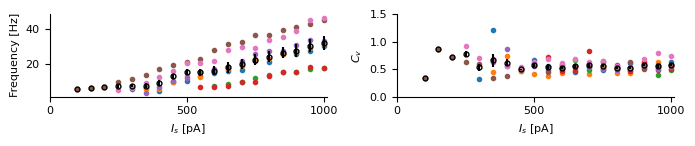

In [137]:
A_0, CV_0 = extract_responses(file_paths_0)
A_mean_0, A_error_0, CV_mean_0, CV_error_0 = plot_individual_responses(firing_rates=A_0, cvs=CV_0, filename='Larkum_Id_0')

C:\Users\Zach Friedenberger\AppData\Local\Temp\ipykernel_25420\2848978890.py:35: RuntimeWarning: Mean of empty slice
  A_mean = np.nanmean(firing_rates, axis=0)
C:\Users\Zach Friedenberger\AppData\Local\Temp\ipykernel_25420\2848978890.py:47: RuntimeWarning: Mean of empty slice
  CV_mean = np.nanmean(cvs, axis=0)


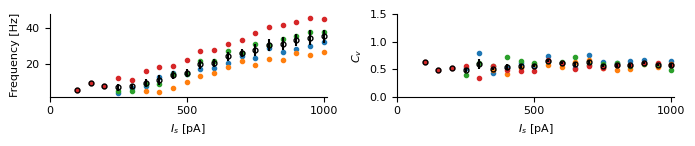

In [138]:
A_250, CV_250 = extract_responses(file_paths_250)
A_mean_250, A_error_250, CV_mean_250, CV_error_250 = plot_individual_responses(firing_rates=A_250, cvs=CV_250, filename='Larkum_Id_250')

C:\Users\Zach Friedenberger\AppData\Local\Temp\ipykernel_25420\2848978890.py:35: RuntimeWarning: Mean of empty slice
  A_mean = np.nanmean(firing_rates, axis=0)
C:\Users\Zach Friedenberger\AppData\Local\Temp\ipykernel_25420\2848978890.py:47: RuntimeWarning: Mean of empty slice
  CV_mean = np.nanmean(cvs, axis=0)


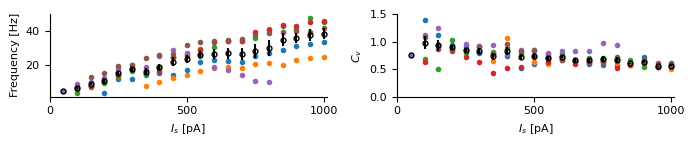

In [139]:
A_500, CV_500 = extract_responses(file_paths_500)
A_mean_500, A_error_500, CV_mean_500, CV_error_500 = plot_individual_responses(firing_rates=A_500, cvs=CV_500, filename='Larkum_Id_500')

In [140]:
def shift_starting(X):
    
    y = X[-1, :]
    z = X[:-1, :] 

    y_tmp = np.hstack((np.asarray([np.nan]*5),y))
    y_tmp = y_tmp[:-5]
    new_X = np.vstack((z, y_tmp))
    
    return new_X

[       nan        nan        nan        nan        nan 0.79780427
 1.15600014 1.0342553  1.11318978 1.06419286 0.90270321 0.86160363
 0.90836331 0.89234249 0.79344993 0.75742017 0.73371082 0.71404007
 0.74568075 0.67051412 0.67088782]


C:\Users\Zach Friedenberger\AppData\Local\Temp\ipykernel_25420\2848978890.py:35: RuntimeWarning: Mean of empty slice
  A_mean = np.nanmean(firing_rates, axis=0)
C:\Users\Zach Friedenberger\AppData\Local\Temp\ipykernel_25420\2848978890.py:47: RuntimeWarning: Mean of empty slice
  CV_mean = np.nanmean(cvs, axis=0)


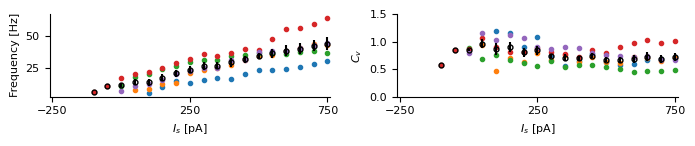

In [141]:
A_750, CV_750 = extract_responses(file_paths_750)

# need to shift one cell that starts at 0 instead of -250
A_750 = shift_starting(A_750)
CV_750 = shift_starting(CV_750)

print(CV_750[-1,:])

A_mean_750, A_error_750, CV_mean_750, CV_error_750 = plot_individual_responses(firing_rates=A_750, cvs=CV_750, filename='Larkum_Id_750', is_750=True)

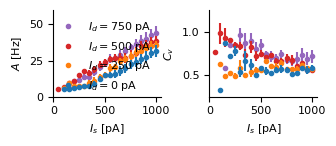

In [142]:
#plt.figure(figsize=(3.4, 1.5))

plt.figure(figsize=(3.4, 1.5))
x = np.arange(21)*50

plt.subplot(1, 2, 1)

plt.plot(x, A_mean_750, '.', color='tab:purple', label='$I_{d}=750$ pA')
plt.errorbar(x, A_mean_750, A_error_750, fmt='None', color='tab:purple')

plt.plot(x, A_mean_500, '.', color='tab:red', label='$I_{d}=500$ pA', alpha=1)
plt.errorbar(x, A_mean_500, A_error_500, fmt='None', color='tab:red', alpha=1)

plt.plot(x, A_mean_250, '.', color='tab:orange', label='$I_{d}=250$ pA', alpha=1)
plt.errorbar(x, A_mean_250, A_error_250, fmt='None', color='tab:orange', alpha=1)

plt.plot(x, A_mean_0, '.', color='tab:blue', label='$I_{d}=0$ pA', alpha=1)
plt.errorbar(x, A_mean_0, A_error_0, fmt='None', color='tab:blue', alpha=1)

plt.ylabel('$A$ [Hz]')
#plt.ylim([0, 25])
plt.legend(frameon=False)
plt.xlabel('$I_{s}$ [pA]')
plt.xticks([0, 500, 1000])
plt.yticks([0, 25, 50])
plt.ylim([0, 60])
#plt.ylim([0,100])
plt.subplot(1, 2, 2)

plt.plot(x[:], CV_mean_750[:], '.', color='tab:purple', label='$I_{d}=750$ pA')
plt.errorbar(x[:], CV_mean_750[:], CV_error_750[:], fmt='None', color='tab:purple')


plt.plot(x[:], CV_mean_500[:], '.', color='tab:red', label='$I_{d}=500$ pA', alpha=1)
plt.errorbar(x[:], CV_mean_500[:], CV_error_500[:], fmt='None', color='tab:red', alpha=1)

plt.plot(x[:], CV_mean_250[:], '.', color='tab:orange', label='$I_{d}=250$ pA', alpha=1)
plt.errorbar(x[:], CV_mean_250[:], CV_error_250[:], fmt='None', color='tab:orange', alpha=1)


plt.plot(x[:], CV_mean_0[:], '.', color='tab:blue', label='$I_{d}=0$ pA', alpha=1)
plt.errorbar(x[:], CV_mean_0[:], CV_error_0[:], fmt='None', color='tab:blue', alpha=1)

plt.xlabel('$I_{s}$ [pA]')
sns.despine()
plt.tight_layout()

plt.ylabel('$C_{v}$')
plt.yticks([0.5, 1, 1.5])
plt.ylim([0.25, 1.25])
plt.xticks([0, 500, 1000])
plt.savefig('../results/LarkumData_CV.svg')

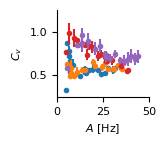

In [143]:
plt.figure(figsize=(1.7, 1.5))

plt.plot(A_mean_0[:], CV_mean_0[:], '.', color='tab:blue', label='$I_{d}=0$ pA')
plt.errorbar(A_mean_0[:], CV_mean_0[:], CV_error_0[:], fmt='None', color='tab:blue')

plt.plot(A_mean_250[:], CV_mean_250[:], '.', color='tab:orange', label='$I_{d}=250$ pA')
plt.errorbar(A_mean_250[:], CV_mean_250[:], CV_error_250[:], fmt='None', color='tab:orange')

plt.plot(A_mean_500[:], CV_mean_500[:], '.', color='tab:red', label='$I_{d}=500$ pA')
plt.errorbar(A_mean_500[:], CV_mean_500[:], CV_error_500[:], fmt='None', color='tab:red')

plt.plot(A_mean_750[:], CV_mean_750[:], '.', color='tab:purple', label='$I_{d}=750$ pA')
plt.errorbar(A_mean_750[:], CV_mean_750[:], CV_error_750[:], fmt='None', color='tab:purple')

sns.despine()
#plt.legend(frameon=False, loc='best')
plt.xticks([0, 25, 50])
plt.yticks([0.5, 1, 1.5])
plt.ylim([0.25, 1.25])
plt.xlabel('$A$ [Hz]')
plt.ylabel('$C_{v}$')
plt.tight_layout()

plt.savefig('../results/LarkumData_CV_versus_A.svg')

# Average over all CV values

In [144]:
CV_mean_0_all = np.nanmean(np.asarray(CV_0))
CV_error_0_all = np.nanstd(np.asarray(CV_0))/np.sqrt(np.shape(np.asarray(CV_0))[0])

CV_mean_500_all = np.nanmean(np.asarray(CV_500))
CV_error_500_all = np.nanstd(np.asarray(CV_500))/np.sqrt(np.shape(np.asarray(CV_500))[0])

CV_mean_250_all = np.nanmean(np.asarray(CV_250))
CV_error_250_all = np.nanstd(np.asarray(CV_250))/np.sqrt(np.shape(np.asarray(CV_250))[0])

CV_mean_750_all = np.nanmean(np.asarray(CV_750))
CV_error_750_all = np.nanstd(np.asarray(CV_750))/np.sqrt(np.shape(np.asarray(CV_750))[0])

In [145]:
CV_error_500_all

0.06961075225503585

Text(0, 0.5, '$<C_{v}>$')

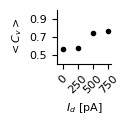

In [146]:
plt.figure(figsize=(0.7, 0.7))
plt.plot(0, CV_mean_0_all, '.', color='k')
plt.plot(250, CV_mean_250_all, '.', color='k')
#plt.errorbar(250, cv_mean_I_250, sem_250, fmt='None')


plt.plot(500, CV_mean_500_all, '.', color='k')
plt.plot(750, CV_mean_750_all, '.', color='k')

plt.ylim([0.4, 1])
plt.yticks([0.5, 0.7, 0.9])
plt.xticks([0, 250, 500, 750], rotation=45)
plt.xlim([-100, 800])
sns.despine()
plt.xlabel('$I_{d}$ [pA]')
plt.ylabel('$<C_{v}>$')

## Check significance

In [147]:
statistic, p_value = stats.ttest_ind(np.asarray(CV_0).flatten(), np.asarray(CV_250).flatten(), equal_var=False, nan_policy='omit')
p_value

0.6099552562278545

In [148]:
statistic, p_value = stats.ttest_ind(np.asarray(CV_0).flatten(), np.asarray(CV_500).flatten(), equal_var=False, nan_policy='omit')
p_value

1.619995926266838e-13

In [149]:
statistic, p_value = stats.ttest_ind(np.asarray(CV_0).flatten(), np.asarray(CV_750).flatten(), equal_var=False, nan_policy='omit')
p_value

3.141601160986026e-13

In [150]:
statistic, p_value = stats.ttest_ind(np.asarray(CV_250).flatten(), np.asarray(CV_500).flatten(), equal_var=False, nan_policy='omit')
p_value

8.365383506389205e-14

In [151]:
statistic, p_value = stats.ttest_ind(np.asarray(CV_250).flatten(), np.asarray(CV_750).flatten(), equal_var=False, nan_policy='omit')
p_value

3.886158456456221e-13

In [152]:
statistic, p_value = stats.ttest_ind(np.asarray(CV_500).flatten(), np.asarray(CV_750).flatten(), equal_var=False, nan_policy='omit')
p_value

0.33424156972290187

C:\Users\Zach Friedenberger\AppData\Local\Temp\ipykernel_25420\285139070.py:34: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


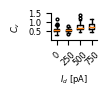

In [153]:
font = {'size'   : 6}
matplotlib.rc('font', **font)

plt.figure(figsize=(0.6, 0.35))

CV_0_all = np.asarray(CV_0).flatten()
CV_0_all = CV_0_all[~np.isnan(CV_0_all)]

CV_250_all = np.asarray(CV_250).flatten()
CV_250_all = CV_250_all[~np.isnan(CV_250_all)]

CV_500_all = np.asarray(CV_500).flatten()
CV_500_all = CV_500_all[~np.isnan(CV_500_all)]

CV_750_all = np.asarray(CV_750).flatten()
CV_750_all = CV_750_all[~np.isnan(CV_750_all)]

data = [CV_0_all, CV_250_all, CV_500_all, CV_750_all]
boxplot_dict = plt.boxplot(data, flierprops={'markersize': 2})


#plt.ylim([0.4, 1.3])
#plt.yticks([0.5, 1, 1.5])
#plt.xticks([250, 500, 750], rotation=0)
#plt.xlim([200, 800])
sns.despine()
plt.xlabel('$I_{d}$ [pA]')
plt.ylabel('$C_{v}$')

plt.ylim([0, 1.5])
plt.yticks([0.5, 1, 1.5])
plt.xticks([1,2,3,4], labels=[0, 250, 500, 750], rotation=45)
#plt.xlim([-100, 800])
plt.tight_layout()

plt.savefig('../results/CV_boxplot.svg')

In [154]:
whiskers = [whiskers.get_ydata() for whiskers in boxplot_dict['whiskers']]
caps = [caps.get_ydata() for caps in boxplot_dict['caps']]
medians = [medians.get_ydata() for medians in boxplot_dict['medians']]
boxes = [boxes.get_ydata() for boxes in boxplot_dict['boxes']]
fliers = [fliers.get_ydata() for fliers in boxplot_dict['fliers']]

# Print the parameter values
print('Whiskers:', whiskers)
print('\n')

print('Caps:', caps)
print('\n')

print('Medians:', medians)
print('\n')

print('Boxes:', boxes)
print('\n')

print('Fliers:', fliers)
print('\n')

Whiskers: [array([0.48946145, 0.31241192]), array([0.62618849, 0.8212292 ]), array([0.51878115, 0.39236702]), array([0.62040211, 0.74860482]), array([0.60925707, 0.43808647]), array([0.83691427, 1.12638261]), array([0.63814117, 0.44483802]), array([0.87958933, 1.19285915])]


Caps: [array([0.31241192, 0.31241192]), array([0.8212292, 0.8212292]), array([0.39236702, 0.39236702]), array([0.74860482, 0.74860482]), array([0.43808647, 0.43808647]), array([1.12638261, 1.12638261]), array([0.44483802, 0.44483802]), array([1.19285915, 1.19285915])]


Medians: [array([0.55221501, 0.55221501]), array([0.57768133, 0.57768133]), array([0.70141585, 0.70141585]), array([0.73371082, 0.73371082])]


Boxes: [array([0.48946145, 0.48946145, 0.62618849, 0.62618849, 0.48946145]), array([0.51878115, 0.51878115, 0.62040211, 0.62040211, 0.51878115]), array([0.60925707, 0.60925707, 0.83691427, 0.83691427, 0.60925707]), array([0.63814117, 0.63814117, 0.87958933, 0.87958933, 0.63814117])]


Fliers: [array([1.2020